## Exploratory Data Analysis (EDA)

- In the EDA we will explore more detaily related to the given dataset using various statistic tools and Visualization Plot such as Barplot, CountPlot, etc.
- This can help us to understand the data and what is the depth of the data. For example we can know how many companys in India are in Public and Private Ownership and pretend there salary.
- It is the second step of Data Science Pipline 

In [1]:
#Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Reading and displying the dataset
df = pd.read_csv('Data_pre_processing.csv')
df.head()

,Title,Location,Company,Rating,Ownership,Industry,Sector,Salary,Description,min_salary,...,Excel,Deep_learning,Macine_learning,Bachelors,Masters,Job_type,Job_simp,Seniority_simp,Industry_simp,Sectors_simp
0,Data Scientist 1,Bangalore,PayPal,4.1,Company - Public,Internet,Information Technology,₹250K - ₹683K (Glassdoor Est.),Who we are: Fueled by a fundamental belief tha...,250,...,1,1,1,1,1,Other,Data Scientist,Other,Internet,Information Technology
1,Data Scientist,Gurgaon,Builder.ai - What would you Build?,3.7,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹527K - ₹798K (Glassdoor Est.),About us\n\nInnovation is fuelled by the power...,527,...,0,1,1,0,1,Other,Data Scientist,Other,Software,Information Technology
2,Machine Learning Engineer - Java/Scala/Spark (...,Bangalore,Oracle,3.8,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹402K - ₹831K (Glassdoor Est.),Oracle Cloud Infrastructure (OCI) is a strateg...,402,...,1,1,1,0,1,Internship,Machine Learing,Other,Software,Information Technology
3,Data Scientist,Bangalore,Nutanix,3.9,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹457K - ₹899K (Glassdoor Est.),We are looking for a Data Scientist who will s...,457,...,1,0,1,0,1,Other,Data Scientist,Other,Software,Information Technology
4,Data Scientist,Chennai,Paypal,4.1,Company - Public,Internet,Information Technology,₹540K - ₹724K (Glassdoor Est.),"At PayPal, were literally reinventing how the ...",540,...,0,1,1,0,1,Other,Data Scientist,Other,Internet,Information Technology


In [3]:
# Informantion of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              586 non-null    object 
 1   Location           586 non-null    object 
 2   Company            586 non-null    object 
 3   Rating             586 non-null    float64
 4   Ownership          515 non-null    object 
 5   Industry           399 non-null    object 
 6   Sector             398 non-null    object 
 7   Salary             586 non-null    object 
 8   Description        418 non-null    object 
 9   min_salary         586 non-null    int64  
 10  max_salary         586 non-null    int64  
 11  avg_salary         586 non-null    float64
 12  Type_of_ownership  586 non-null    object 
 13  Python             586 non-null    int64  
 14  Aws                586 non-null    int64  
 15  Excel              586 non-null    int64  
 16  Deep_learning      586 non

In [4]:
#Total columns names
df.columns

Index(['Title', 'Location', 'Company', 'Rating', 'Ownership', 'Industry',
       'Sector', 'Salary', 'Description', 'min_salary', 'max_salary',
       'avg_salary', 'Type_of_ownership', 'Python', 'Aws', 'Excel',
       'Deep_learning', 'Macine_learning', 'Bachelors', 'Masters', 'Job_type',
       'Job_simp', 'Seniority_simp', 'Industry_simp', 'Sectors_simp'],
      dtype='object')

### Total columns and length of its unique values

In [5]:
for i in df.columns[:]:
    print("{} label contains total : {} values".format(i,len(df[i].unique())))

Title label contains total : 208 values
Location label contains total : 41 values
Company label contains total : 441 values
Rating label contains total : 29 values
Ownership label contains total : 11 values
Industry label contains total : 42 values
Sector label contains total : 18 values
Salary label contains total : 486 values
Description label contains total : 406 values
min_salary label contains total : 284 values
max_salary label contains total : 292 values
avg_salary label contains total : 402 values
Type_of_ownership label contains total : 3 values
Python label contains total : 2 values
Aws label contains total : 2 values
Excel label contains total : 2 values
Deep_learning label contains total : 2 values
Macine_learning label contains total : 2 values
Bachelors label contains total : 2 values
Masters label contains total : 2 values
Job_type label contains total : 4 values
Job_simp label contains total : 5 values
Seniority_simp label contains total : 3 values
Industry_simp label c

In [6]:
print('Total number of unique locations: {}'.format(len(df['Location'].unique())))

Total number of unique locations: 41


### Top 15 Job location and there total counts of job in the dataset 

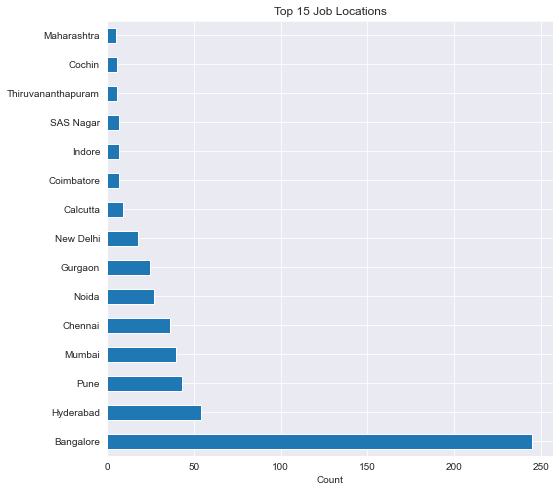

In [7]:
plt.figure(figsize=(8,8))
g = df["Location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

Observation :  Banglore has more job opportunity of Data science related to the dataset with Hyderabad, Pune, Mumbai, Chennai as (2,3,4,5) large cities for Data Science. 

### Now we are converting the less number of locations count into Other attribute 
- Because this reduce the over sample of location which as less no of jobs as compare to others
- We will group Location with Location and take each locations total count from dataset and choose the Location if count less then 10 will convert into Other and remaining as it is

In [8]:
loc_stat = df.groupby('Location')['Location'].agg('count').sort_values(ascending =False)
loc_stat

Location
Bangalore             245
Hyderabad              54
Pune                   43
Mumbai                 40
Chennai                36
Noida                  27
Gurgaon                25
New Delhi              18
Calcutta                9
Coimbatore              7
SAS Nagar               7
Indore                  7
Thiruvananthapuram      6
Cochin                  6
Maharashtra             5
India                   5
Navi Mumbai             4
Ahmedabad               4
Gandhinagar             4
Mangalore               3
Udaipur                 3
Nellore                 2
Nagpur                  2
Faridabad               2
Madurai                 2
Chandigarh              2
Tiruchchirappalli       2
Remote                  2
Vijayawada              2
Tiruppur                1
Vadodara                1
Vellore                 1
Agra                    1
Mysore                  1
Guwahati                1
Chatra                  1
Calicut                 1
Bhubaneshwar            1
Bar

In [9]:
#Location less then or equal to 10 will store in location_less_them_10
location_less_them_10 = loc_stat[loc_stat <= 10]
location_less_them_10

Location
Calcutta              9
Coimbatore            7
SAS Nagar             7
Indore                7
Thiruvananthapuram    6
Cochin                6
Maharashtra           5
India                 5
Navi Mumbai           4
Ahmedabad             4
Gandhinagar           4
Mangalore             3
Udaipur               3
Nellore               2
Nagpur                2
Faridabad             2
Madurai               2
Chandigarh            2
Tiruchchirappalli     2
Remote                2
Vijayawada            2
Tiruppur              1
Vadodara              1
Vellore               1
Agra                  1
Mysore                1
Guwahati              1
Chatra                1
Calicut               1
Bhubaneshwar          1
Bara Banki            1
Ambala                1
Jaipur                1
Name: Location, dtype: int64

In [10]:
# Appling the other method to Location column
df['Location'] = df['Location'].apply(lambda x : 'Other' if x in location_less_them_10 else x)

In [11]:
#Total count of Location values
df['Location'].value_counts()

Bangalore    245
Other         98
Hyderabad     54
Pune          43
Mumbai        40
Chennai       36
Noida         27
Gurgaon       25
New Delhi     18
Name: Location, dtype: int64

In [12]:
# Staicstical Discriotion of our dataset
df.describe()

,Rating,min_salary,max_salary,avg_salary,Python,Aws,Excel,Deep_learning,Macine_learning,Bachelors,Masters
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,3.927474,421.513652,715.539249,568.526451,0.500000,0.145051,0.366894,0.349829,0.462457,0.126280,0.638225
std,0.497150,177.199662,177.921713,162.342343,0.500427,0.352453,0.482369,0.477323,0.499015,0.332448,0.480925
min,2.000000,120.000000,183.000000,158.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.700000,277.750000,598.250000,453.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,412.500000,734.000000,571.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.200000,519.750000,838.750000,674.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,5.000000,992.000000,1287.000000,1139.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Count of Top 15 companys in dataset

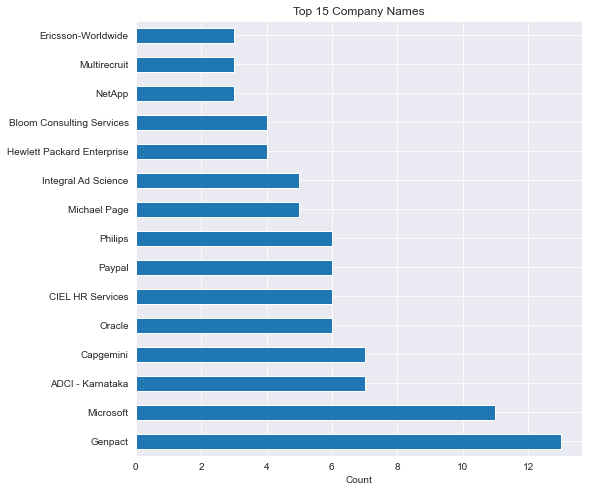

In [13]:
plt.figure(figsize=(8,8))
g = df["Company"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

Observation : Dataset contains more job opportunity compinies such as Genpact, Microsoft which are higher then other companys

## Total Count of Type of Ownership in dataset

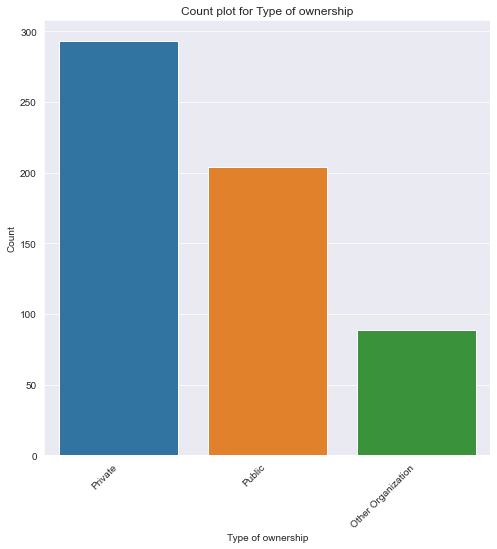

In [14]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type_of_ownership', data=df, order = df['Type_of_ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

Observation : Private Ownership contains more jobs opportunity the the public and other Organizations.
- Private contains total around 290 jobs where as Public around 205 and Other Organizations with around 90

## Groupby method by Location feature with Minimum, Average and Maximum salary feature and Ploting them

Note : The Salarys are based on per annum scale with each as (k)

In [15]:
# Defining function to plot any feature with Salary feature
def plot_salary(feature1, feature2 , dataset, ylabel_name):
    
    fig = plt.figure(figsize=(10,6))
    dataset = dataset.sort_values(by=feature2, ascending=False) #sorthing dataset by feature2 and Desending order
    ax = sns.barplot(feature2, feature1, data=dataset ,palette="Blues_d", saturation=.5)
    plt.title('Bar Plot of ' + feature1 + " and its "+ ylabel_name + " Salary")
    plt.xlabel(ylabel_name+" Salary", fontsize=15)
    plt.ylabel(feature1 , fontsize=15)

    
    cat_num = dataset[feature2].value_counts()
    
    print('')
    print("Graph for "+ feature1 +" and "+ feature2 +": Total Values = %d" % (len(cat_num)))
  
    for i, v in enumerate(dataset[feature2]):
        ax.text(v, i, str(v)+' (k)', fontsize=11, fontweight = 'bold')

    plt.show()

In [16]:
#Taking the Minimum salary from Minimum salary feature grouping by location and Aggregating with min value and sorting it by Minimum salary Feature
Min_salary_by_Location = df.groupby('Location')[['min_salary']].agg('min').sort_values(by='min_salary', ascending=False)
Min_salary_by_Location.reset_index(inplace=True)
Min_salary_by_Location 

,Location,min_salary
0,Gurgaon,240
1,Chennai,181
2,Hyderabad,180
3,Noida,150
4,Pune,150
5,Bangalore,146
6,New Delhi,123
7,Mumbai,121
8,Other,120



Graph for Location and min_salary: Total Values = 8


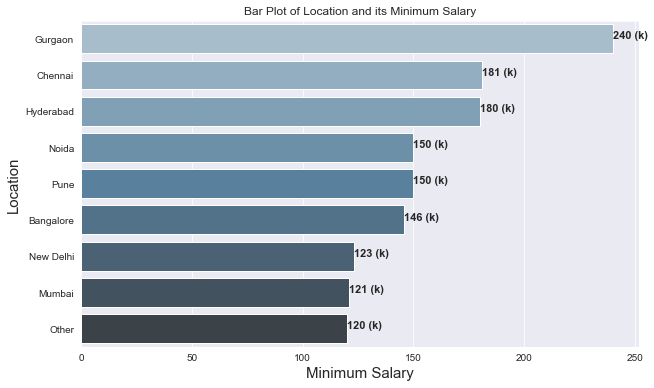

In [17]:
# Ploting the Minimum salary of each Location with Min_salary_by_Location grouupby dataset
plot_salary('Location', 'min_salary' , Min_salary_by_Location, "Minimum")

In [18]:
#Calcualting the Average salary from Average salary feature and grouping by location and Aggregating with mean value and sorting it by Average salary Feature
Avg_salary = round(df.groupby(['Location'])[['avg_salary']].agg(np.mean).sort_values(by='avg_salary', ascending=False),2)
Avg_salary.reset_index(inplace=True)
Avg_salary

,Location,avg_salary
0,Bangalore,608.44
1,New Delhi,595.36
2,Hyderabad,572.01
3,Gurgaon,566.02
4,Pune,557.83
5,Mumbai,540.60
6,Chennai,535.18
7,Other,507.87
8,Noida,506.80



Graph for Location and avg_salary: Total Values = 9


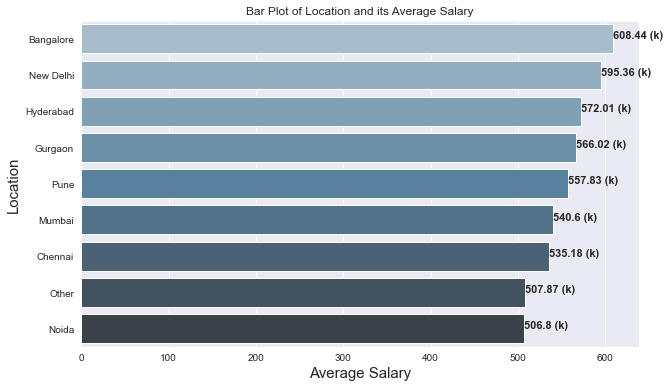

In [19]:
# Ploting the Average salary of each Location with Avg_salary grouupby dataset
plot_salary('Location', 'avg_salary' , Avg_salary, "Average")

In [20]:
#Taking the Maximum salary from Maximum salary feature grouping by location and Aggregating with max value and sorting it by Maximum salary Feature
Max_salary_by_Location = df.groupby(['Location'])[['max_salary']].agg('max').sort_values(by='max_salary', ascending=False)
Max_salary_by_Location.reset_index(inplace=True)
Max_salary_by_Location 

,Location,max_salary
0,Mumbai,1287
1,Gurgaon,1119
2,Bangalore,1094
3,Other,1080
4,Pune,1011
5,New Delhi,1006
6,Noida,983
7,Chennai,980
8,Hyderabad,955



Graph for Location and max_salary: Total Values = 9


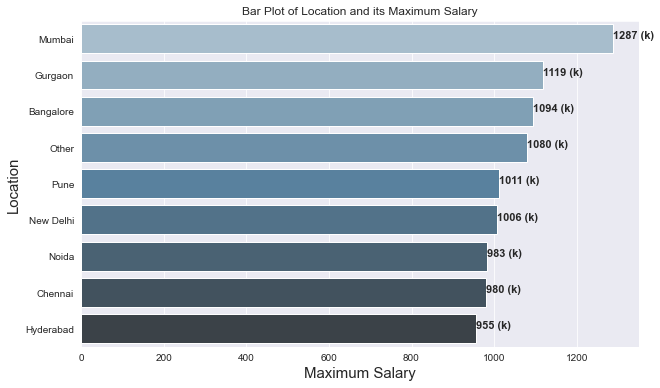

In [21]:
# Ploting the Maximum salary of each Location with Maximum grouupby dataset
plot_salary('Location', 'max_salary' , Max_salary_by_Location, "Maximum")

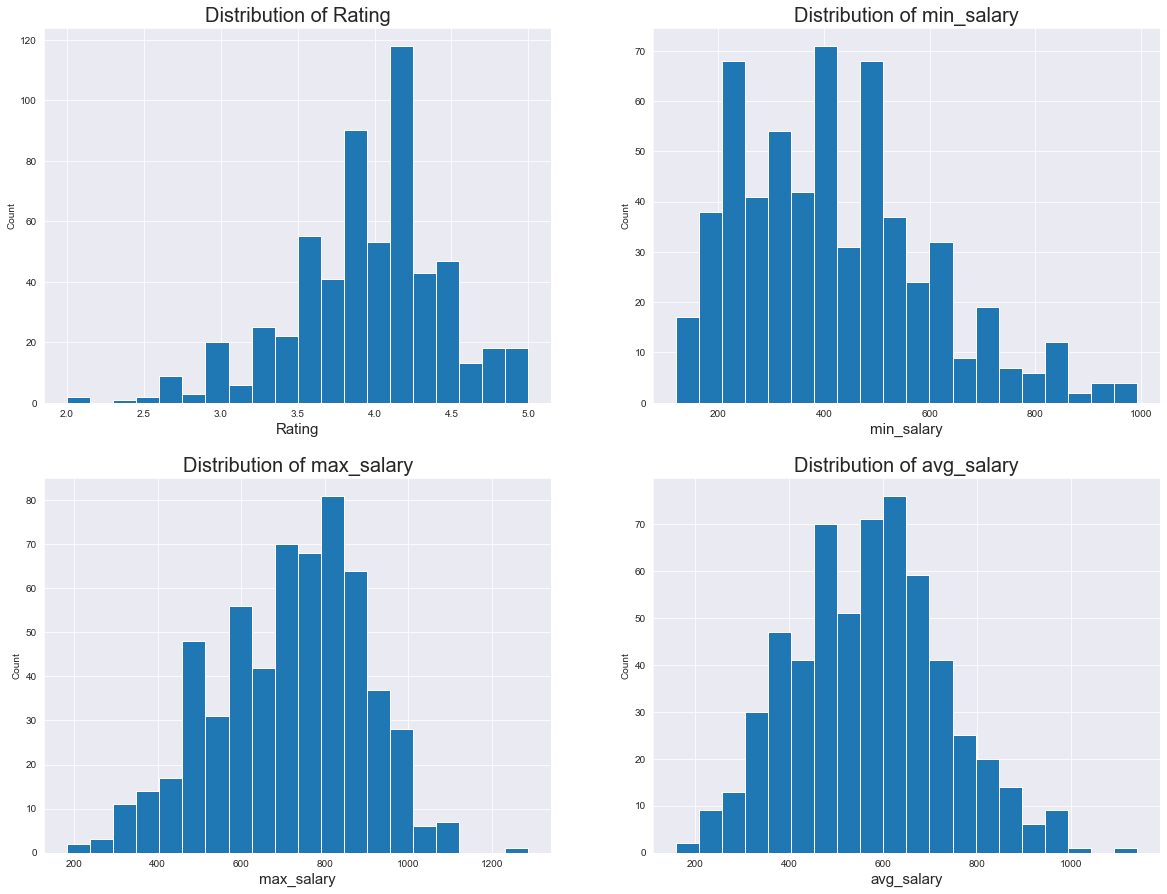

In [22]:
# Visualizing the feature by using matplotlib hist function

plot_hist = df[['Rating', 'min_salary', 'max_salary', 'avg_salary']]

nrows = 5
ncolumns=2
subCnt=1
plt.figure(figsize=(20,40))

for column in plot_hist:
    plt.subplot(nrows,ncolumns,subCnt)
    plt.hist(df[column],bins = 20)
    plt.title("Distribution of "+column, fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Count')
    subCnt = subCnt + 1

plt.show()

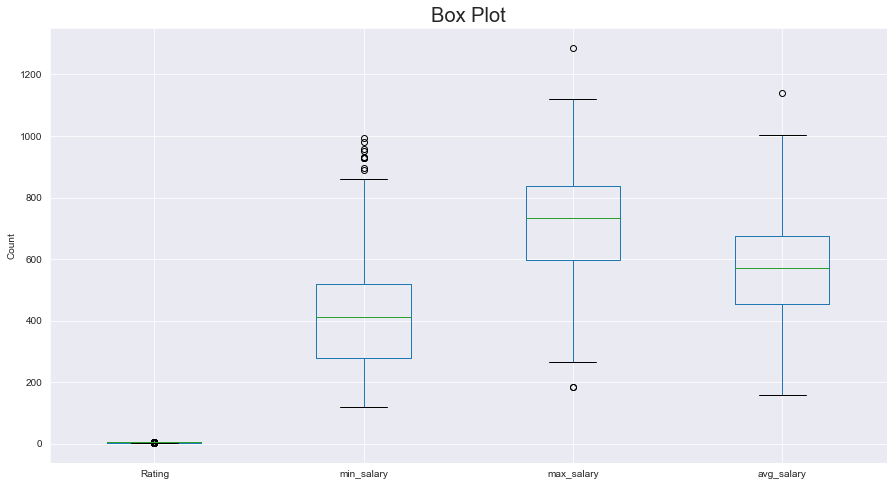

In [23]:
plt.figure(figsize=(15,8))
df.boxplot(column = ['Rating', 'min_salary', 'max_salary', 'avg_salary'])
plt.title("Box Plot", fontsize=20)
plt.ylabel('Count')
plt.show()

## Categorical values Plot

In [24]:
# Function for ploting categorical features  
def plot_categorical(feature , dataset):
    
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of ' + feature)
    plt.xlabel('Count' , fontsize=15)
    plt.ylabel(feature , fontsize=15)
    
    cat_num = dataset[feature].value_counts() # Total values count of feature
    print('')
    print("Graph for "+ feature +": Total Values = %d" % (len(cat_num)))
    
    total = len(dataset[feature])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total) # Precentage of each feature
            x = p.get_x() + p.get_width() + 0.8                      # count of x axis to place the Precentage
            y = p.get_y() + p.get_height()/2                         # count of y axis to place the Precentage
            ax.annotate(percentage, (x, y))
    plt.show()


Graph for Location: Total Values = 9


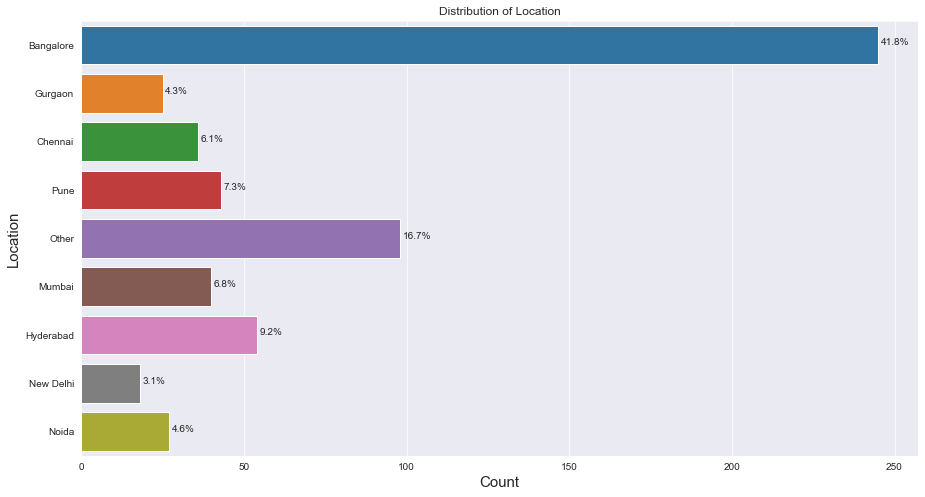

In [25]:
fig = plt.figure(figsize=(15,8))
plot_categorical('Location' , df)

Observation : As per the above plot Bangalore occupies highest number on Data Science jobs in India with (41.8%) as per the dataset


Graph for Type_of_ownership: Total Values = 3


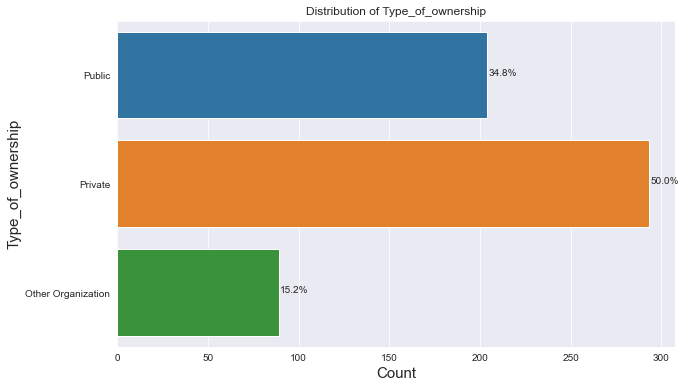

In [26]:
fig = plt.figure(figsize=(10,6))
plot_categorical('Type_of_ownership' , df)

Observation : Private Ownership contains more jobs opportunity the the public and other Organizations.

Private contains total around 50% of total numbers of Ownership where as Public 34.8% and Other Organizations with around 15%


Graph for Industry: Total Values = 41


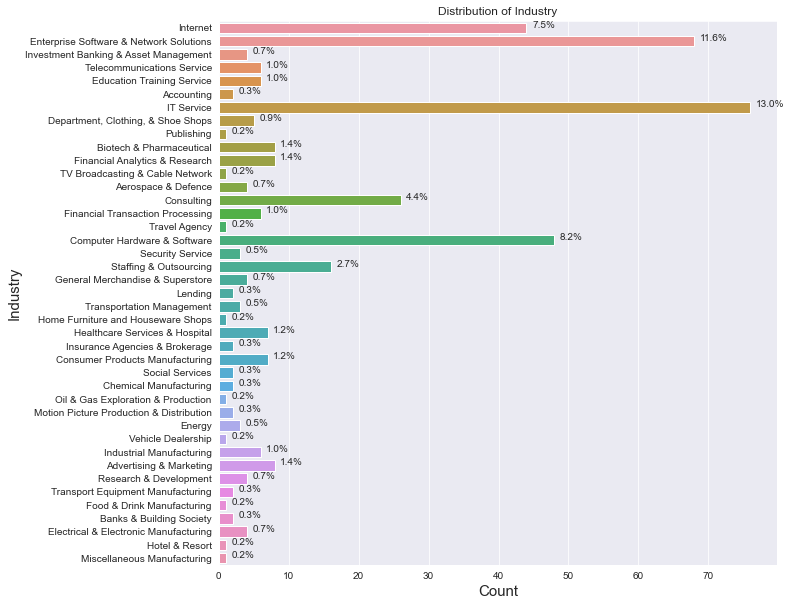

In [27]:
# Total count of each Industry in dataset
fig = plt.figure(figsize=(10,10))
plot_categorical('Industry' , df)


Graph for Sector: Total Values = 17


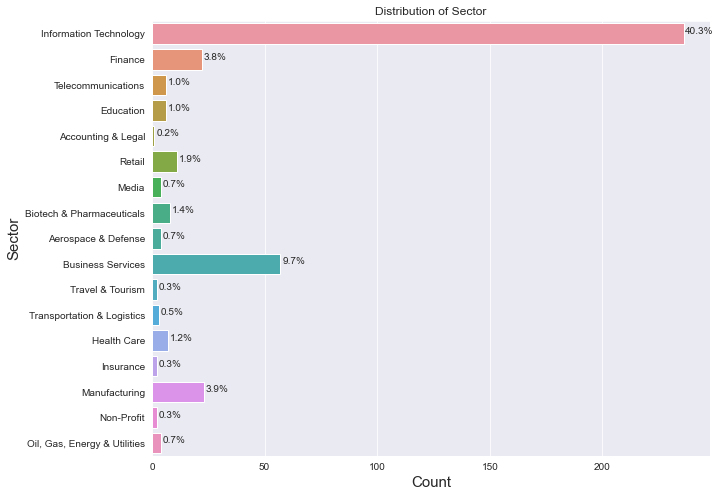

In [28]:
# Total count of each Sector in dataset
fig = plt.figure(figsize=(10,8))
plot_categorical('Sector' , df)


Graph for Industry_simp: Total Values = 6


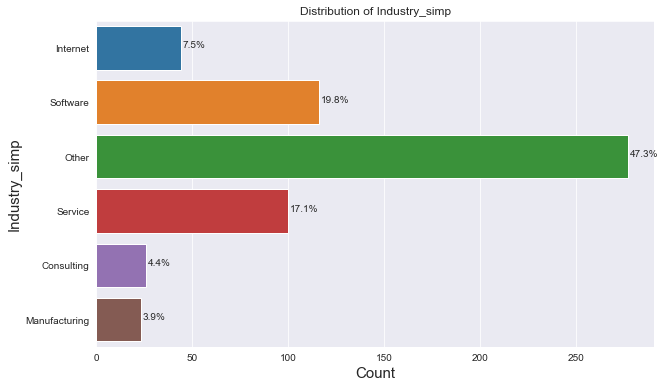

In [29]:
# Total count of each Industry_simp in dataset
fig = plt.figure(figsize=(10,6))
plot_categorical('Industry_simp' , df)


Graph for Seniority_simp: Total Values = 3


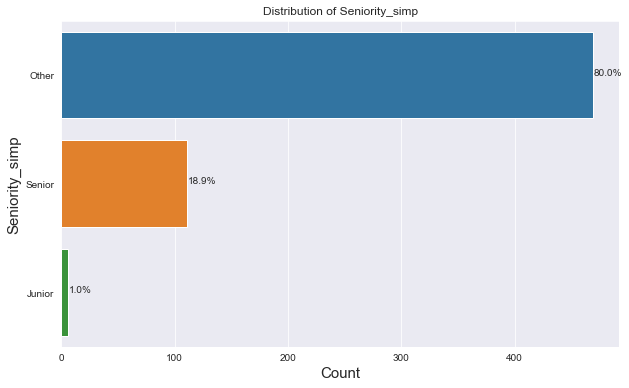

In [30]:
# Total count of each sectors_simp in dataset
fig = plt.figure(figsize=(10,6))
plot_categorical('Seniority_simp' , df)


Graph for Job_simp: Total Values = 5


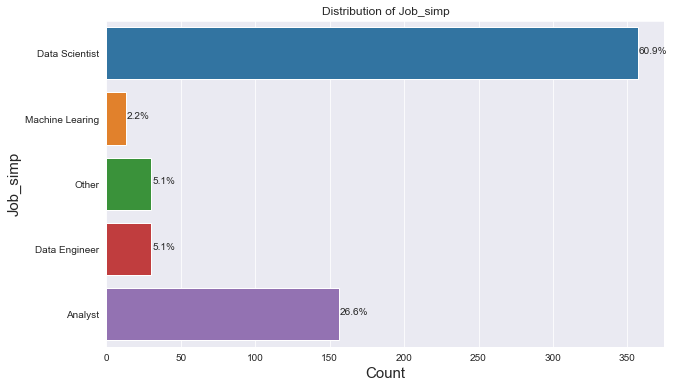

In [31]:
fig = plt.figure(figsize=(10,6))
plot_categorical('Job_simp' , df)

Observation : Data Scientist job as more demand the all the other job as per the dataset


Graph for Python: Total Values = 2


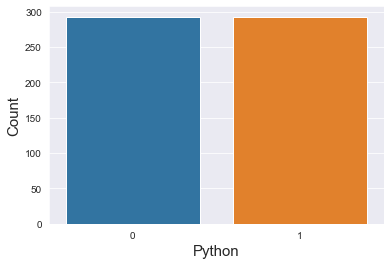


Graph for Aws: Total Values = 2


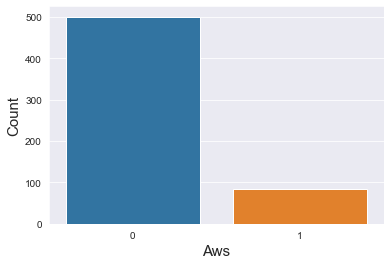


Graph for Excel: Total Values = 2


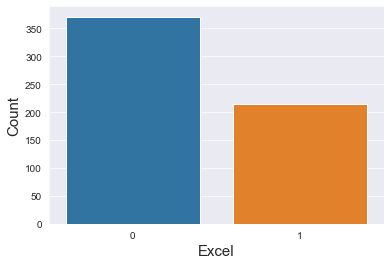


Graph for Deep_learning: Total Values = 2


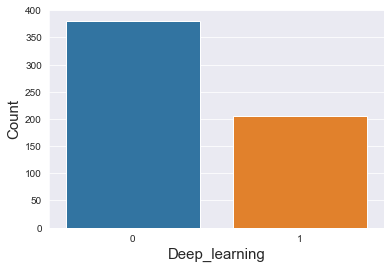


Graph for Macine_learning: Total Values = 2


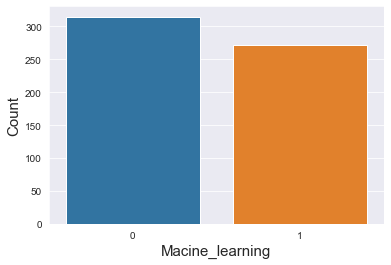


Graph for Bachelors: Total Values = 2


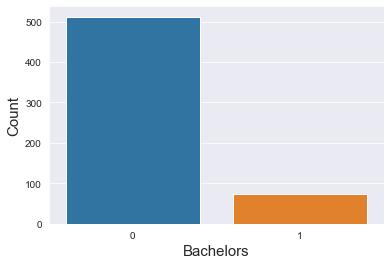


Graph for Masters: Total Values = 2


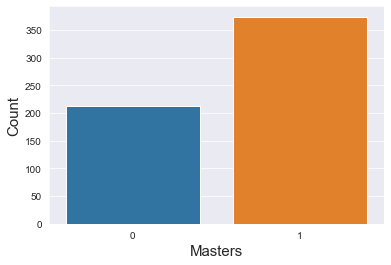

In [32]:
types = df[['Python', 'Aws', 'Excel', 'Deep_learning', 'Macine_learning', 'Bachelors', 'Masters']]

for i in types.columns:
    cal_tot = df[i].value_counts()
    print('')
    print("Graph for %s: Total Values = %d" % (i, len(cal_tot)))
    chart = sns.barplot(x=cal_tot.index, y=cal_tot)
    plt.xlabel(i , fontsize=15)
    plt.ylabel('Count' , fontsize=15)
    plt.show()

In [33]:
pd.pivot_table(df, index = ['Job_simp','Seniority_simp'], values = 'avg_salary')

avg_salary
Job_simp        Seniority_simp            
Analyst         Junior          403.000000
                Other           461.394040
                Senior          706.125000
Data Engineer   Other           602.095238
                Senior          623.055556
Data Scientist  Junior          539.700000
                Other           599.050000
                Senior          658.532609
Machine Learing Other           555.545455
                Senior          511.500000
Other           Other           551.884615
                Senior          371.875000

In [34]:
def plot_pivot_table(feature1, feature2 , dataset, ylabel_name,he_value):
    
    fig = plt.figure(figsize=(12,8))
    dataset = dataset.sort_values(by=feature1, ascending=True).reset_index()
    
    ax = sns.barplot(feature1, feature2, data=dataset , saturation=.5, hue=he_value)
    plt.title('Bar Plot of ' + feature1 + " and Type of Ownership with "+ ylabel_name + " Salary")
    plt.xlabel(feature1 , fontsize=15)
    plt.ylabel(ylabel_name +" (k)", fontsize=15)

    cat_num = dataset[feature2].value_counts()
    
    print('')
    print("Graph for "+ feature1 +" and "+ feature2 +": Total Values = %d" % (len(cat_num)))
  
    
    plt.show()

In [35]:
data_Science = pd.pivot_table(df[df.Job_simp == 'Data Scientist'], index = ['Location','Type_of_ownership'], values = 'avg_salary').sort_values('Location', ascending = False)
data_Science

avg_salary
Location  Type_of_ownership             
Pune      Public              611.312500
          Private             639.710526
          Other Organization  462.000000
Other     Public              604.375000
          Private             605.086957
          Other Organization  658.900000
Noida     Public              623.583333
          Private             486.230769
New Delhi Private             576.125000
          Other Organization  762.000000
Mumbai    Private             534.705882
          Public              705.142857
          Other Organization  566.250000
Hyderabad Public              582.500000
          Private             586.928571
          Other Organization  615.166667
Gurgaon   Public              678.500000
          Private             682.812500
          Other Organization  684.000000
Chennai   Public              601.450000
          Private             587.125000
          Other Organization  619.200000
Bangalore Private             602.528986
          Public              652.162338
          Other Organization  592.250000


Graph for Location and avg_salary: Total Values = 25


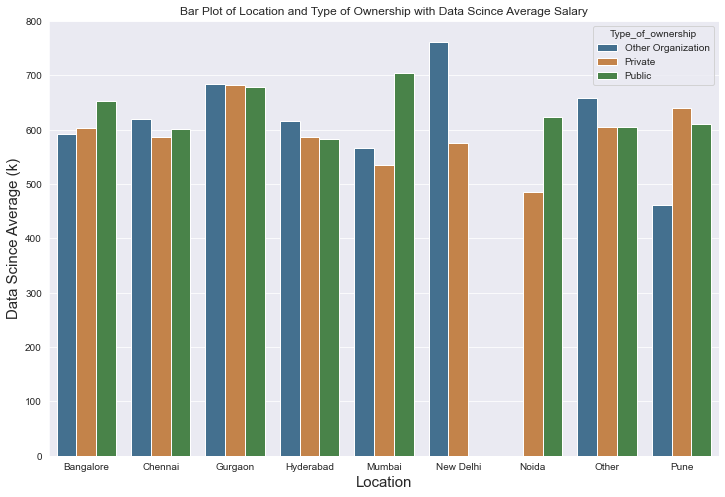

In [36]:
# Bar plot of location and there average salary of Data science with Type of ownership
plot_pivot_table('Location', 'avg_salary' , data_Science, 'Data Scince Average','Type_of_ownership')

Observation : There are total 9 cities and 3 Types of Ownership
- We can observe each city with Average Salary by Type of Ownership of Data Science Job

Note : The Highest Ownership of each city as follows : 
- Private Ownership for Data Sciense is in Gurgaon
- Public Ownership for Data Sciense is in Gurgaon
- Other Ownership for Data Sciense is in New Delhi

In [37]:
Machine_Learing =pd.pivot_table(df[df.Job_simp == 'Machine Learing'],index = ['Location','Type_of_ownership'], values = 'avg_salary').sort_values('Location', ascending = False)
Machine_Learing

avg_salary
Location  Type_of_ownership             
Other     Other Organization       550.0
Hyderabad Other Organization       604.0
          Public                   684.0
Gurgaon   Private                  699.5
Chennai   Other Organization       578.5
          Public                   497.0
Bangalore Private                  513.0
          Public                   491.6


Graph for Location and avg_salary: Total Values = 8


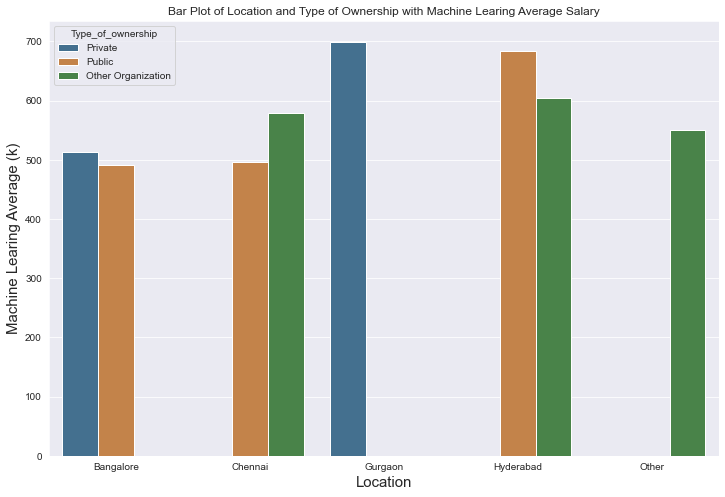

In [38]:
plot_pivot_table('Location', 'avg_salary' , Machine_Learing, 'Machine Learing Average', 'Type_of_ownership')

Observation : We can observe each city with Average Salary by Type of Ownership of Machine Learning Job

Note : The Highest Ownership of each city as follows :
- Private Ownership for Machine Learning is in Gurgaon
- Public Ownership for Data Sciense is in Hyderabad
- Other Ownership for Data Sciense is in Hyderabad

In [39]:
Analyst =pd.pivot_table(df[df.Job_simp == 'Analyst'],index = ['Location','Type_of_ownership'], values = 'avg_salary').sort_values('Location', ascending = False)
Analyst

avg_salary
Location  Type_of_ownership             
Pune      Public              857.500000
          Private             366.166667
          Other Organization  345.300000
Other     Public              451.500000
          Private             363.625000
          Other Organization  429.428571
Noida     Public              486.000000
          Private             370.250000
          Other Organization  444.000000
New Delhi Private             511.916667
Mumbai    Public              416.375000
          Private             557.250000
          Other Organization  390.166667
Hyderabad Public              576.500000
          Private             429.142857
          Other Organization  659.000000
Gurgaon   Private             458.611111
          Other Organization  384.000000
Chennai   Public              320.000000
          Private             306.500000
          Other Organization  365.833333
Bangalore Private             532.104167
          Public              604.913043
          Other Organization  549.100000


Graph for Location and avg_salary: Total Values = 24


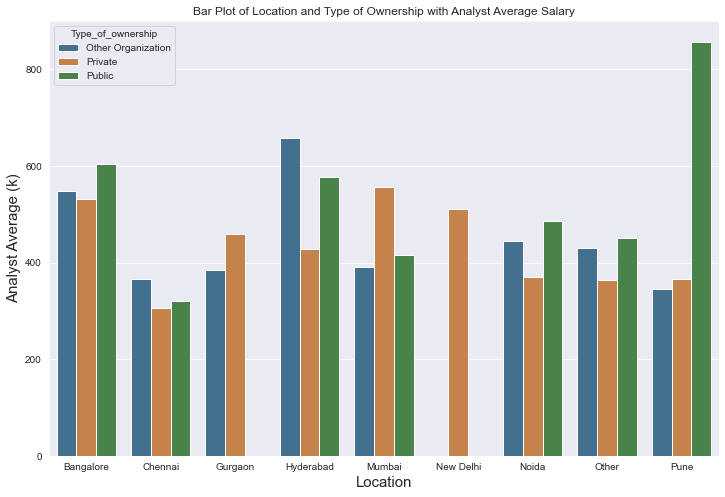

In [40]:
plot_pivot_table('Location', 'avg_salary' , Analyst, 'Analyst Average','Type_of_ownership')

Observation : We can observe each city with Average Salary by Type of Ownership of Analyst Job

Note : The Highest Ownership of each city as follows :
- Private Ownership for Analyst is in Mumbai
- Public Ownership for Analyst is in Pune
- Other Ownership for Analyst is in Hyderabad

In [41]:
def plot_location_with_averagesalary(feature1, feature2 , dataset, ylabel_name):
    
    fig = plt.figure(figsize=(12,8))
    dataset = dataset.sort_values(by=feature2, ascending = False).reset_index()
    
    ax = sns.barplot(feature2,feature1, data=dataset , saturation=.5)
    plt.title('Bar Plot of ' + feature1 + " and its "+ ylabel_name + " Salary")
    plt.xlabel(ylabel_name +" (k)", fontsize=15)
    plt.ylabel(feature1 , fontsize=15)

    cat_num = dataset[feature2].value_counts()
    
    print('')
    print("Graph for "+ feature1 +" and "+ feature2 +": Total Values = %d" % (len(cat_num)))
    
    for i, v in enumerate(dataset[feature2]):
        v = round(v)
        ax.text(v, i, str(v)+' (k)', fontsize=12, fontweight = 'bold')

    plt.show()

In [42]:
Data_Science = pd.pivot_table(df[df.Job_simp == 'Data Scientist'], index = ['Location'], values = 'avg_salary').sort_values('avg_salary', ascending = False)
Data_Science

,avg_salary
Location,
Gurgaon,682.500000
New Delhi,626.818182
Bangalore,625.515625
Pune,625.250000
Other,622.510870
Chennai,600.326087
Hyderabad,590.088235
Mumbai,583.019231
Noida,529.605263



Graph for Location and avg_salary: Total Values = 9


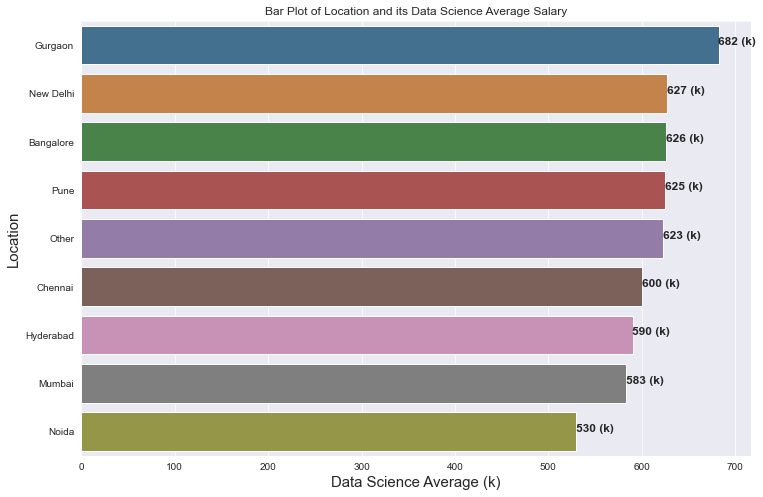

In [43]:
plot_location_with_averagesalary('Location', 'avg_salary' , Data_Science, 'Data Science Average')

Observation : The Average Salary of Data Scientist in Gurgaon is Higher with 682(k) the other all cities

In [44]:
Machine_learning_avg = pd.pivot_table(df[df.Job_simp == 'Machine Learing'], index = ['Location'], values = 'avg_salary').sort_values('avg_salary', ascending = False)
Machine_learning_avg

,avg_salary
Location,
Gurgaon,699.500000
Hyderabad,644.000000
Other,550.000000
Chennai,537.750000
Bangalore,495.166667



Graph for Location and avg_salary: Total Values = 5


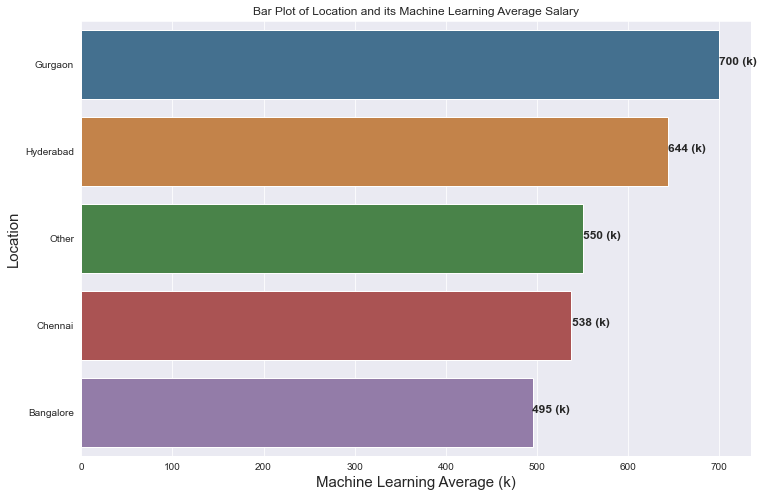

In [45]:
plot_location_with_averagesalary('Location', 'avg_salary' , Machine_learning_avg, 'Machine Learning Average')

Observation : The Average Salary of Machine Learning job in Gurgaon is Higher with 700(k) the other all cities

In [46]:
Analyst_salary = pd.pivot_table(df[df.Job_simp == 'Analyst'],index = ['Location'], values = 'avg_salary').sort_values('avg_salary', ascending = False)
Analyst_salary

,avg_salary
Location,
Bangalore,565.942308
New Delhi,511.916667
Hyderabad,490.227273
Gurgaon,451.150000
Mumbai,438.944444
Noida,417.625000
Pune,398.416667
Other,396.545455
Chennai,330.437500



Graph for Location and avg_salary: Total Values = 9


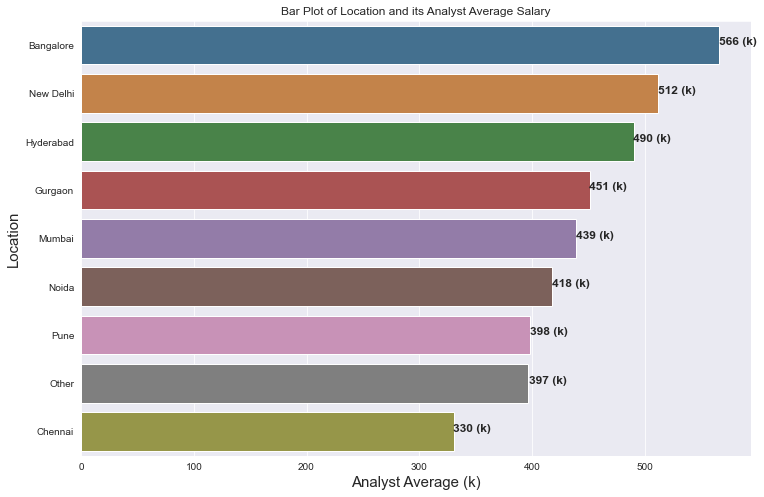

In [47]:
plot_location_with_averagesalary('Location', 'avg_salary' , Analyst_salary, 'Analyst Average')

Observation : The Average Salary of Analyst job in Bangalore is Higher with 566(k) the other all cities

In [48]:
Industry_simp = pd.pivot_table(df,index ='Industry_simp', values = 'avg_salary').sort_values('avg_salary', ascending = False)
Industry_simp

,avg_salary
Industry_simp,
Service,601.870000
Software,597.974138
Internet,594.625000
Manufacturing,594.434783
Consulting,565.730769
Other,538.122744


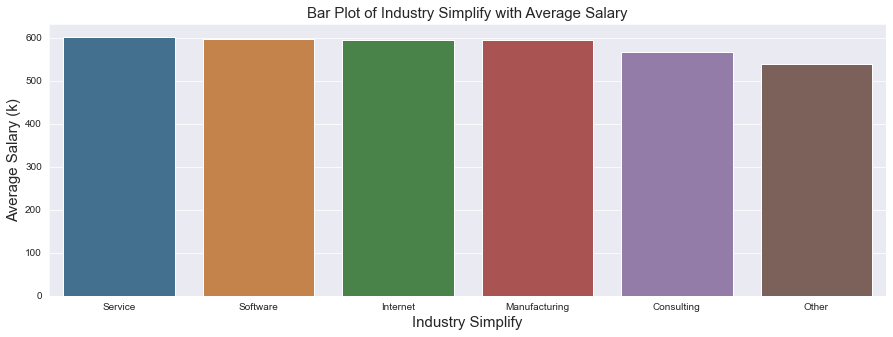

In [49]:
plt.figure(figsize=(15,5))
ax = sns.barplot('Industry_simp','avg_salary', data=Industry_simp.reset_index() , saturation=.5)
plt.title('Bar Plot of Industry Simplify with Average Salary' ,fontsize = 15)
plt.xlabel('Industry Simplify' ,fontsize = 15)
plt.ylabel('Average Salary (k)'  ,fontsize = 15)
plt.show()

Observation : As we can observe Service, Software, Internet, Manfacturing Industries as approximately same Average Salary with 600(k) where as Counsulting with 550 (k) and Other contains around 520(k)

In [50]:
sectors_simp = pd.pivot_table(df,index ='Sectors_simp', values = 'avg_salary').sort_values('avg_salary', ascending = False)
sectors_simp

,avg_salary
Sectors_simp,
Health Care,610.100000
Manufacturing,593.808824
Information Technology,593.500000
Finance,589.395833
Other,541.770455
Services,533.587719


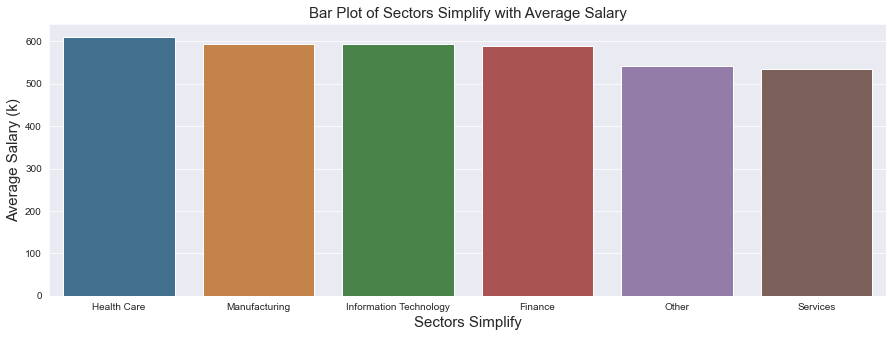

In [51]:
plt.figure(figsize=(15,5))
ax = sns.barplot('Sectors_simp','avg_salary', data=sectors_simp.reset_index() , saturation=.5)
plt.title('Bar Plot of Sectors Simplify with Average Salary' ,fontsize = 15)
plt.xlabel('Sectors Simplify' ,fontsize = 15)
plt.ylabel('Average Salary (k)' ,fontsize = 15)
plt.show()

Observation : Health Care Sectors Average Salary slightly higher the all other Sectors

In [52]:
Ratings = pd.pivot_table(df,index =['Rating'], values = 'avg_salary').sort_values('avg_salary', ascending = False)
Ratings

,avg_salary
Rating,
4.9,748.166667
2.1,680.000000
3.8,633.673077
4.1,618.000000
3.9,607.000000
3.3,606.218750
4.2,603.601695
4.0,585.169811
3.5,568.080000


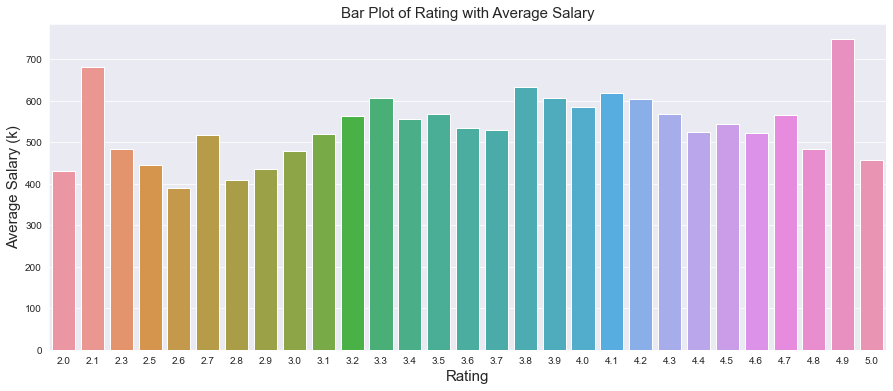

In [53]:
plt.figure(figsize=(15,6))
sns.barplot('Rating','avg_salary', data = Ratings.reset_index())
plt.title('Bar Plot of Rating with Average Salary' ,fontsize = 15)
plt.xlabel('Rating' ,fontsize = 15)
plt.ylabel('Average Salary (k)' ,fontsize = 15)
plt.show()

Observation : There is no fix Average Salary based on Ratings it goes on flucting 

Note : Low Ratings Companys is also approximately paying same Salary as compare to High Ratings Companys

## End of Exploratory Data Analysis (EDA)

In [54]:
df.to_csv('Enter your entire file path where you want to save the file\eda_data.csv')